In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# 1 | Data Understanding

In [44]:
# Load data
data = pd.read_csv("./data/vodafone_age_subset.csv")

data.head()

,CALCULATION_METHOD_ID,calls_count_in_weekdays,calls_duration_in_weekdays,calls_count_out_weekdays,calls_duration_out_weekdays,calls_count_in_weekends,calls_duration_in_weekends,calls_count_out_weekends,calls_duration_out_weekends,DATA_VOLUME_WEEKDAYS,...,applemaps_volume,applemaps_count,msoffice365_volume,msoffice365_count,jabber_volume,jabber_count,telegram_volume,telegram_count,user_hash,target
0,2,10.87,32.025,17.74,40.819,7.00,21.463,11.13,20.427,154.837,...,0.0,0.0,0.09,9.29,0.0000,0.0,0.0,0.0,312ca09052ac6eb49fbd2a546a782df5,4
1,1,0.91,1.346,0.48,0.546,0.25,0.688,0.75,0.708,53.639,...,0.0,0.0,0.00,0.00,0.0033,0.1,0.0,0.0,327733ea2cea082b48707d2700b49327,4
2,2,0.00,0.000,0.00,0.000,0.00,0.000,0.00,0.000,0.000,...,0.0,0.0,0.00,0.00,0.0000,0.0,0.0,0.0,22ede60385359c8c24bc68449ca56763,6
3,2,7.39,30.278,11.00,44.182,5.00,20.008,8.38,32.385,0.000,...,0.0,0.0,0.00,0.00,0.0000,0.0,0.0,0.0,67682b3b1d1319a7cf90ed80eb16b899,5
4,1,0.43,0.996,0.70,1.609,2.25,3.115,0.00,0.000,0.000,...,0.0,0.0,0.00,0.00,0.0000,0.0,0.0,0.0,334e5ceddcc4f11f261322832526ae49,3


In [45]:
print(data.columns, '\n')
print(data.index)

Index(['CALCULATION_METHOD_ID', 'calls_count_in_weekdays',
       'calls_duration_in_weekdays', 'calls_count_out_weekdays',
       'calls_duration_out_weekdays', 'calls_count_in_weekends',
       'calls_duration_in_weekends', 'calls_count_out_weekends',
       'calls_duration_out_weekends', 'DATA_VOLUME_WEEKDAYS',
       ...
       'applemaps_volume', 'applemaps_count', 'msoffice365_volume',
       'msoffice365_count', 'jabber_volume', 'jabber_count', 'telegram_volume',
       'telegram_count', 'user_hash', 'target'],
      dtype='object', length=116) 

RangeIndex(start=0, stop=21000, step=1)


> I decided to categorize the number of connections and traffic from all services, which will make it easier to perceive and work with the data and prevent information from being lost.

---

Here are the categories I received:

| **category**                          | **services** |
|------------------------------------|----------------------------------------------------------------|
| `social_networks_and_messengers` | [Facebook](https://www.facebook.com), [Instagram](https://www.instagram.com), [Twitter](https://www.twitter.com), [LinkedIn](https://www.linkedin.com), [Tumblr](https://www.tumblr.com), [Viber](https://www.viber.com), [Skype](https://www.skype.com), [WhatsApp](https://www.whatsapp.com), [Snapchat](https://www.snapchat.com), [Telegram](https://www.telegram.org), [Jabber](https://www.jabber.org) |
| `video_content_and_streaming`    | [YouTube](https://www.youtube.com), [Twitch](https://www.twitch.tv), [Netflix](https://www.netflix.com) |
| `cloud_services_and_email`       | [Google](https://www.google.com), [Gmail](https://www.gmail.com), [Dropbox](https://www.dropbox.com), [Flickr](https://www.flickr.com) |
| `online_services_and_digital_stores` | [Steam](https://store.steampowered.com), [iTunes](https://www.apple.com/itunes), [MS Office](https://www.microsoft.com/microsoft-365) |
| `maps_and_transport`             | [Apple Maps](https://www.apple.com/maps), [Uber](https://www.uber.com) |
| `dating_and_social_platforms`    | [Badoo](https://www.badoo.com), [Tinder](https://www.tinder.com) |


In [46]:
info_tmp = data.iloc[:,64:113]
print(info_tmp.info())

# Cut off the necessary features to be categorized
social_networks_and_messengers_volume= data.iloc[:, [64, 66, 68, 76, 78, 86, 90, 92, 96, 110, 112]].copy()
social_networks_and_messengers_count= data.iloc[:, [65, 67, 69, 77, 79, 87, 91, 93, 97, 111, 113]].copy()
print(social_networks_and_messengers_count.columns)

video_content_and_streaming_volume = data.iloc[:, [70, 94, 104]].copy()
video_content_and_streaming_count = data.iloc[:, [71, 95, 105]].copy()
print(video_content_and_streaming_count.columns)

cloud_services_and_email_volume = data.iloc[:, [80, 72, 74, 98]].copy()
cloud_services_and_email_count = data.iloc[:, [81, 73, 75, 99]].copy()
print(cloud_services_and_email_count.columns)

online_services_and_digital_stores_volume = data.iloc[:, [84, 88, 108]].copy()
online_services_and_digital_stores_count = data.iloc[:, [85, 89, 109]].copy()
print(online_services_and_digital_stores_count.columns)

maps_and_transport_volume = data.iloc[:, [82, 106]].copy()
maps_and_transport_count = data.iloc[:, [83, 107]].copy()
print(maps_and_transport_count.columns)

dating_and_social_platforms_volume = data.iloc[:, [100, 102]].copy()
dating_and_social_platforms_count = data.iloc[:, [101, 103]].copy()
print(dating_and_social_platforms_count.columns)

# Summarize and combine into one dataframe
social_networks_and_messengers_volume =  social_networks_and_messengers_volume.sum(axis=1).to_frame('social_networks_and_messengers_volume')
social_networks_and_messengers_count = social_networks_and_messengers_count.sum(axis=1).to_frame('social_networks_and_messengers_count')

video_content_and_streaming_volume= video_content_and_streaming_volume.sum(axis=1).to_frame('video_content_and_streaming_volume')
video_content_and_streaming_count = video_content_and_streaming_count.sum(axis=1).to_frame('video_content_and_streaming_count')

cloud_services_and_email_volume = cloud_services_and_email_volume.sum(axis=1).to_frame('cloud_services_and_email_volume')
cloud_services_and_email_count = cloud_services_and_email_count.sum(axis=1).to_frame('cloud_services_and_email_count')

online_services_and_digital_stores_volume = online_services_and_digital_stores_volume.sum(axis=1).to_frame('online_services_and_digital_stores_volume')
online_services_and_digital_stores_count = online_services_and_digital_stores_count.sum(axis=1).to_frame('online_services_and_digital_stores_count')

maps_and_transport_volume= maps_and_transport_volume.sum(axis=1).to_frame('maps_and_transport_volume')
maps_and_transport_count = maps_and_transport_count.sum(axis=1).to_frame('maps_and_transport_count')

dating_and_social_platforms_volume = dating_and_social_platforms_volume.sum(axis=1).to_frame('dating_and_social_platforms_volume')
dating_and_social_platforms_count = dating_and_social_platforms_count.sum(axis=1).to_frame('dating_and_social_platforms_count')


category_traffic = pd.concat([social_networks_and_messengers_volume, social_networks_and_messengers_count,
                        video_content_and_streaming_volume, video_content_and_streaming_count,
                        cloud_services_and_email_volume, cloud_services_and_email_count,
                        online_services_and_digital_stores_volume, online_services_and_digital_stores_count,
                        maps_and_transport_volume, maps_and_transport_count,
                        dating_and_social_platforms_volume, dating_and_social_platforms_count], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fb_volume           21000 non-null  float64
 1   fb_count            21000 non-null  float64
 2   instagram_volume    21000 non-null  float64
 3   intagram_count      21000 non-null  float64
 4   viber_volume        21000 non-null  float64
 5   viber_count         21000 non-null  float64
 6   youtube_volume      21000 non-null  float64
 7   youtube_count       21000 non-null  float64
 8   google_volume       21000 non-null  float64
 9   google_count        21000 non-null  float64
 10  gmail_volume        21000 non-null  float64
 11  gmail_count         21000 non-null  float64
 12  skype_volume        21000 non-null  float64
 13  skype_count         21000 non-null  float64
 14  twitter_volume      21000 non-null  float64
 15  twitter_count       21000 non-null  float64
 16  drop

In [47]:
category_traffic.head()

,social_networks_and_messengers_volume,social_networks_and_messengers_count,video_content_and_streaming_volume,video_content_and_streaming_count,cloud_services_and_email_volume,cloud_services_and_email_count,online_services_and_digital_stores_volume,online_services_and_digital_stores_count,maps_and_transport_volume,maps_and_transport_count,dating_and_social_platforms_volume,dating_and_social_platforms_count
0,88.5716,700.72,17.6650,208.84,12.1852,540.29,0.1988,9.58,0.0,0.0,0.0,0.0
1,2.2058,32.04,1.9411,13.13,2.6986,113.16,0.0000,0.00,0.0,0.0,0.0,0.0
2,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0,0.0,0.0,0.0
3,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0,0.0,0.0,0.0
4,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0,0.0,0.0,0.0


> From the beginning, I will be deleting columns that I deem irrelevant or too specific.

In [48]:
temp_data = data[['CALCULATION_METHOD_ID'
                  ,'Oblast_post_HOME','Raion_post_HOME','City_post_HOME'
                  ,'Oblast_post_WORK','Raion_post_WORK','City_post_WORK'
                  ,'device_type_rus','sim_count','AVG_ARPU','phone_value'
                  ,'SCORING','car','gender','DATA_VOLUME_WEEKDAYS','DATA_VOLUME_WEEKENDS'
                  ,'calls_count_in_weekdays','calls_duration_in_weekdays','calls_count_out_weekdays'
                  ,'calls_duration_out_weekdays','calls_count_in_weekends','calls_duration_in_weekends'
                  ,'calls_count_out_weekends','calls_duration_out_weekends'
                  ,'lifetime','how_long_same_model','ecommerce_score'
                  ,'banks_sms_count','gas_stations_sms'
                  ,'user_hash','target'
                  ]]

eda_data = pd.concat([temp_data, category_traffic], axis= 1)


In [49]:
eda_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 43 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   CALCULATION_METHOD_ID                      21000 non-null  int64  
 1   Oblast_post_HOME                           21000 non-null  object 
 2   Raion_post_HOME                            21000 non-null  object 
 3   City_post_HOME                             21000 non-null  object 
 4   Oblast_post_WORK                           21000 non-null  object 
 5   Raion_post_WORK                            21000 non-null  object 
 6   City_post_WORK                             21000 non-null  object 
 7   device_type_rus                            21000 non-null  object 
 8   sim_count                                  21000 non-null  float64
 9   AVG_ARPU                                   21000 non-null  float64
 10  phone_value           

In [50]:
eda_data.head()

,CALCULATION_METHOD_ID,Oblast_post_HOME,Raion_post_HOME,City_post_HOME,Oblast_post_WORK,Raion_post_WORK,City_post_WORK,device_type_rus,sim_count,AVG_ARPU,...,video_content_and_streaming_volume,video_content_and_streaming_count,cloud_services_and_email_volume,cloud_services_and_email_count,online_services_and_digital_stores_volume,online_services_and_digital_stores_count,maps_and_transport_volume,maps_and_transport_count,dating_and_social_platforms_volume,dating_and_social_platforms_count
0,2,Одеська,Овідіопольський,Авангард,Одеська,Одеса,Одеса,smartphone,2.0,260.739450,...,17.6650,208.84,12.1852,540.29,0.1988,9.58,0.0,0.0,0.0,0.0
1,1,Одеська,Одеса,Одеса,Одеська,Одеса,Одеса,smartphone,2.0,52.635025,...,1.9411,13.13,2.6986,113.16,0.0000,0.00,0.0,0.0,0.0,0.0
2,2,Дніпропетровська,Дніпро,Дніпро,Дніпропетровська,Дніпро,Дніпро,phone,2.0,22.189575,...,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0,0.0,0.0,0.0
3,2,Дніпропетровська,Павлоградський,Булахівка,Дніпропетровська,Павлоградський,Межеріч,phone,2.0,41.816525,...,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0,0.0,0.0,0.0
4,1,Луганська,Хрустальний,Хрустальний,Луганська,Хрустальний,Хрустальний,smartphone,2.0,39.863417,...,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0,0.0,0.0,0.0


> After these manipulations it turned out that out of **116** there are **43** features left.

# 2 | Data Cleaning

In [51]:
# Check anomaly
for column in eda_data.columns:
    print(eda_data[f'{column}'].value_counts())

CALCULATION_METHOD_ID
2    10588
1    10412
Name: count, dtype: int64
Oblast_post_HOME
Київ                    3041
Харківська              2132
Дніпропетровська        1640
0                       1295
Краматорська філія      1094
Запорізька              1073
Київська                1065
Одеська                 1062
Луганська                922
Полтавська               873
Херсонська               838
Донецька                 747
Сумська                  639
Львівська                482
Миколаївська             456
Волинська                452
Кіровоградська           446
Закарпатська             430
Івано-Франківська        405
Чернівецька              385
Чернігівська             331
Сєвєродонецька філія     326
Черкаська                198
Рівненська               182
Вінницька                118
Житомирська              110
Тернопільська            104
Криворізька філія         85
Хмельницька               69
Name: count, dtype: int64
Raion_post_HOME
Київ             3041
Харків  

In [52]:
# Made sure that the users are unique, this column is no longer needed.
eda_data = eda_data.drop('user_hash', axis = 1)

# Trim
eda_data = eda_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Drop zero values
eda_data = eda_data[eda_data['City_post_HOME'] != '0']
eda_data = eda_data[eda_data['Oblast_post_HOME'] != '0']
eda_data = eda_data[eda_data['SCORING'] != '0']
eda_data = eda_data[eda_data['phone_value'] != 0]

#------------------------------------Logical transformations---------------------------------------
eda_data.loc[(eda_data['City_post_WORK'] == '0') 
             & (eda_data['Raion_post_WORK'] == '0') 
             & (eda_data['Oblast_post_WORK'] == '0'),
             ['City_post_WORK','Raion_post_WORK', 'Oblast_post_WORK']] = 'DONT_WORK'

eda_data['SCORING'] = eda_data['SCORING'].map({'VERY LOW': 0, 
                                               'LOW': 1, 
                                               'MEDIUM': 2, 
                                               'HIGH_MEDIUM': 3, 
                                               'HIGH': 4 })

eda_data['CALCULATION_METHOD_ID'] = eda_data['CALCULATION_METHOD_ID'].map({ 1: 0,
                                                                            2: 1})

# There were 3 categories of devices in the description
eda_data.loc[eda_data['device_type_rus'] == '0' , 'device_type_rus'] = 'laptop'
# A user of a mobile operator cannot not have a SIM card
eda_data.loc[eda_data['sim_count'] == 0 , 'sim_count'] = 1

# Change control 
for column in eda_data.columns:
    print(eda_data[f'{column}'].value_counts(), '\n')

CALCULATION_METHOD_ID
0    9938
1    9678
Name: count, dtype: int64 

Oblast_post_HOME
Київ                    3030
Харківська              2116
Дніпропетровська        1635
Краматорська філія      1086
Запорізька              1066
Київська                1062
Одеська                 1060
Луганська                920
Полтавська               870
Херсонська               832
Донецька                 745
Сумська                  634
Львівська                481
Миколаївська             454
Волинська                451
Кіровоградська           442
Закарпатська             429
Івано-Франківська        405
Чернівецька              385
Чернігівська             328
Сєвєродонецька філія     324
Черкаська                197
Рівненська               179
Вінницька                118
Житомирська              110
Тернопільська            104
Криворізька філія         84
Хмельницька               69
Name: count, dtype: int64 

Raion_post_HOME
Київ             3030
Харків           1489
Дніпро       

In [53]:
eda_data = eda_data.reset_index(drop=True)
print(eda_data.columns, '\n')
print(eda_data.index)

Index(['CALCULATION_METHOD_ID', 'Oblast_post_HOME', 'Raion_post_HOME',
       'City_post_HOME', 'Oblast_post_WORK', 'Raion_post_WORK',
       'City_post_WORK', 'device_type_rus', 'sim_count', 'AVG_ARPU',
       'phone_value', 'SCORING', 'car', 'gender', 'DATA_VOLUME_WEEKDAYS',
       'DATA_VOLUME_WEEKENDS', 'calls_count_in_weekdays',
       'calls_duration_in_weekdays', 'calls_count_out_weekdays',
       'calls_duration_out_weekdays', 'calls_count_in_weekends',
       'calls_duration_in_weekends', 'calls_count_out_weekends',
       'calls_duration_out_weekends', 'lifetime', 'how_long_same_model',
       'ecommerce_score', 'banks_sms_count', 'gas_stations_sms', 'target',
       'social_networks_and_messengers_volume',
       'social_networks_and_messengers_count',
       'video_content_and_streaming_volume',
       'video_content_and_streaming_count', 'cloud_services_and_email_volume',
       'cloud_services_and_email_count',
       'online_services_and_digital_stores_volume',
       'o

In [54]:
eda_data.head(20)

,CALCULATION_METHOD_ID,Oblast_post_HOME,Raion_post_HOME,City_post_HOME,Oblast_post_WORK,Raion_post_WORK,City_post_WORK,device_type_rus,sim_count,AVG_ARPU,...,video_content_and_streaming_volume,video_content_and_streaming_count,cloud_services_and_email_volume,cloud_services_and_email_count,online_services_and_digital_stores_volume,online_services_and_digital_stores_count,maps_and_transport_volume,maps_and_transport_count,dating_and_social_platforms_volume,dating_and_social_platforms_count
0,1,Одеська,Овідіопольський,Авангард,Одеська,Одеса,Одеса,smartphone,2.0,260.739450,...,17.6650,208.84,12.1852,540.29,0.1988,9.58,0.0000,0.00,0.0,0.0
1,0,Одеська,Одеса,Одеса,Одеська,Одеса,Одеса,smartphone,2.0,52.635025,...,1.9411,13.13,2.6986,113.16,0.0000,0.00,0.0000,0.00,0.0,0.0
2,1,Дніпропетровська,Дніпро,Дніпро,Дніпропетровська,Дніпро,Дніпро,phone,2.0,22.189575,...,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0,0.0
3,1,Дніпропетровська,Павлоградський,Булахівка,Дніпропетровська,Павлоградський,Межеріч,phone,2.0,41.816525,...,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0,0.0
4,0,Луганська,Хрустальний,Хрустальний,Луганська,Хрустальний,Хрустальний,smartphone,2.0,39.863417,...,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0,0.0
5,0,Харківська,Харків,Харків,Харківська,Харків,Харків,smartphone,2.0,55.291350,...,1.5669,2.71,10.2889,164.94,0.0000,0.00,0.0000,0.00,0.0,0.0
6,1,Дніпропетровська,Новомосковський,Новомосковськ,Дніпропетровська,Новомосковський,Новомосковськ,phone,2.0,176.769967,...,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0,0.0
7,1,Донецька,Донецьк,Донецьк,Донецька,Донецьк,Донецьк,phone,2.0,53.615917,...,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0,0.0
8,0,Волинська,Луцьк,Луцьк,Волинська,Луцьк,Луцьк,smartphone,1.0,107.919633,...,6.1131,7.42,9.3856,343.39,1.9745,84.87,0.5452,16.61,0.0,0.0
9,1,Луганська,Луганськ,Луганськ,Луганська,Луганськ,Ювілейне,phone,1.0,34.530008,...,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0000,0.00,0.0,0.0


# 3 | Exploratory Data Analysis

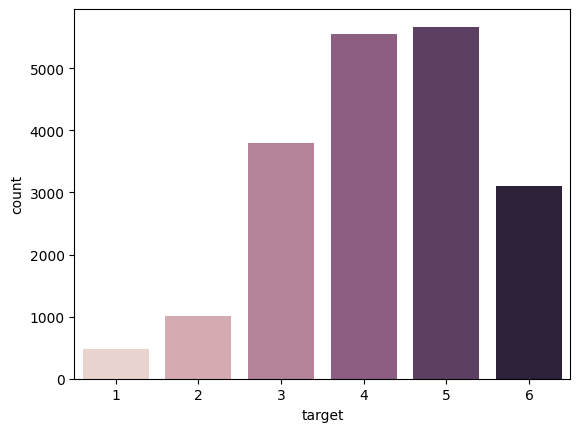

In [55]:
sns.countplot(data=eda_data, x='target', hue='target', legend=None)
plt.show()

## Insights

### Ability to pay

> *`AVG_ARPU` - average cost of services used by a subscriber per month, including roaming*
>
> This column can be used to **find/evaluate** interesting **patterns/relationships** between the `target` and `other features`.

In [56]:
eda_data.groupby('target')['AVG_ARPU'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
1,484.0,66.712777,82.373017,0.0,34.741135,55.466883,79.488971,1221.244092
2,1013.0,79.369859,80.181014,0.0,46.632200,71.583892,96.916450,1998.811242
3,3801.0,85.436557,91.637441,0.0,42.165517,63.644667,95.783692,1083.606025
4,5553.0,84.416585,107.584061,0.0,38.041558,57.415908,88.830717,2097.953883
5,5668.0,73.926367,105.320078,0.0,34.626829,51.481896,77.061008,2944.478783
6,3097.0,54.034073,90.985150,0.0,28.714633,40.749317,57.657892,2914.529717


> `AVG_ARPU` has a scatter of values, so in the future we will use the median instead of the mean.

In [57]:
eda_data.groupby('target')['AVG_ARPU'].median().sort_values(ascending=False)

target
2    71.583892
3    63.644667
4    57.415908
1    55.466883
5    51.481896
6    40.749317
Name: AVG_ARPU, dtype: float64

> We see that the user of the **2nd** and **3rd** age group spends more on average than all others.

In [58]:
print(eda_data.pivot_table(index='car', columns='target', aggfunc='median' ,values=['AVG_ARPU']))
print(eda_data.pivot_table(index='car', columns='target', aggfunc=lambda x: x.mode()[0] ,values=['sim_count']))

         AVG_ARPU                                                       
target          1          2          3          4          5          6
car                                                                     
0       53.308900  66.098408  54.226875  47.903808  45.335508  36.773933
1       76.940533  81.927917  74.726508  68.333133  60.015204  49.279208
       sim_count                         
target         1    2    3    4    5    6
car                                      
0            1.0  1.0  1.0  1.0  1.0  1.0
1            1.0  1.0  1.0  1.0  1.0  1.0


> It can be seen that subscribers who have a car pay more per month on average for the tariff.

In [59]:
eda_data.pivot_table(index='ecommerce_score', columns='target', aggfunc='median' ,values=['AVG_ARPU'])

AVG_ARPU                                              \
target                   1          2          3          4          5   
ecommerce_score                                                          
0                48.909951  62.218671  53.716358  50.932008  48.040946   
1                67.958342  77.148608  75.675967  73.066579  66.773438   

                            
target                   6  
ecommerce_score             
0                39.290725  
1                60.041133

> This table shows that subscribers who tend to make online purchases pay much more per month on average for the tariff. It makes sense for such users to make more mailings with offers to change the tariff plan or one-time promotional packages.

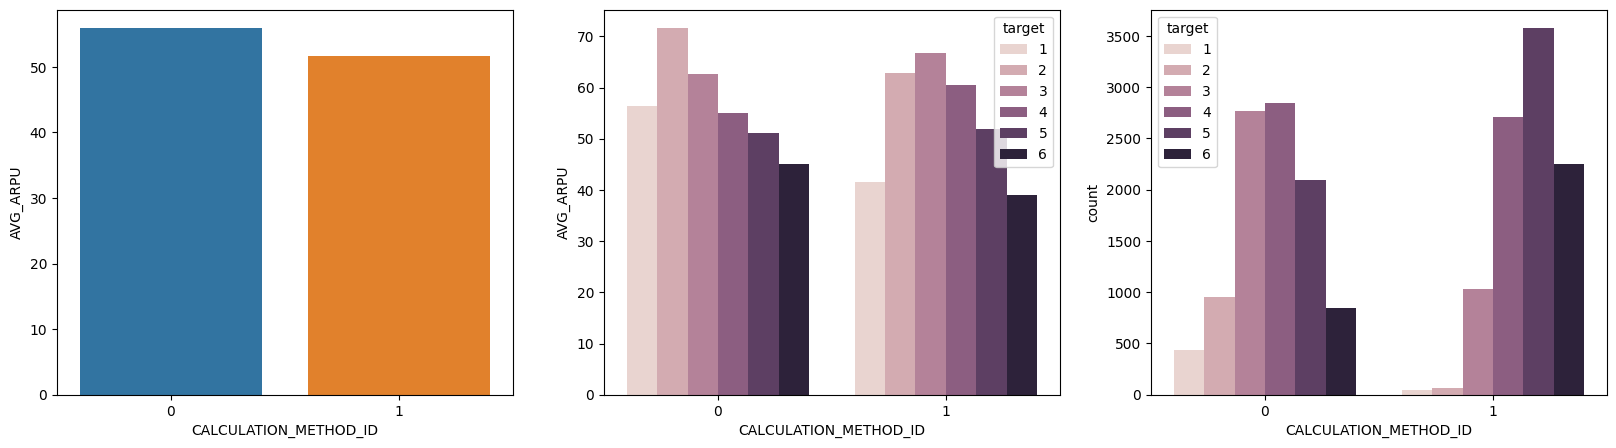

AVG_ARPU                                              \
target                         1          2          3          4          5   
CALCULATION_METHOD_ID                                                          
0                      56.470321  71.613871  62.719333  55.094792  51.081892   
1                      41.563121  62.810508  66.776525  60.523567  51.834475   

                                  
target                         6  
CALCULATION_METHOD_ID             
0                      44.999917  
1                      38.930079

In [60]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
sns.barplot(data=eda_data, x='CALCULATION_METHOD_ID', y='AVG_ARPU'
            , hue='CALCULATION_METHOD_ID', legend=None, errorbar=None, estimator='median', ax= axes[0])
sns.barplot(data=eda_data, x='CALCULATION_METHOD_ID', y='AVG_ARPU'
            , hue='target' , errorbar=None, estimator='median', ax= axes[1])
sns.countplot(data= eda_data, x='CALCULATION_METHOD_ID'
              , hue='target', ax= axes[2])
plt.show()
eda_data.pivot_table(index='CALCULATION_METHOD_ID', columns='target', aggfunc='median' ,values=['AVG_ARPU'])

> * We see that subscribers, regardless of the way they receive services, pay the same. But we see that there is a significant difference between the average monthly tariff fee depending on the age group.
> * As the age group increases, the number of users on contract increases.

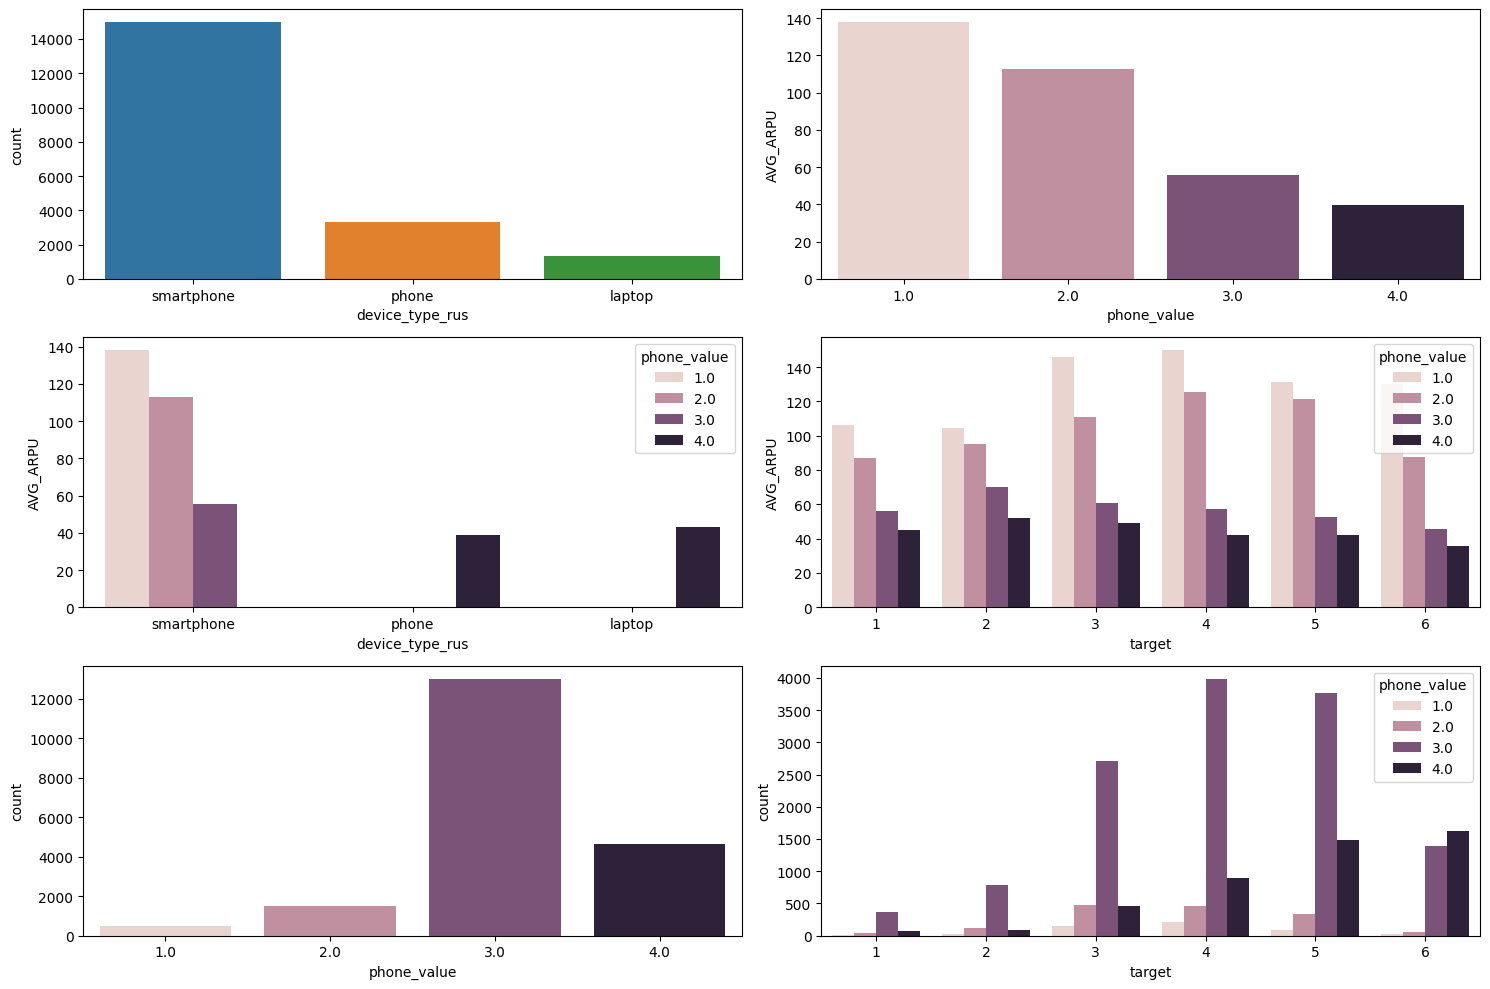

AVG_ARPU                                                  \
target                1           2           3           4           5   
phone_value                                                               
1.0          106.078650  104.188067  145.578150  149.829292  131.081971   
2.0           86.996442   95.329804  110.834658  125.208533  121.397725   
3.0           55.832004   70.205971   60.582542   57.087371   52.579142   
4.0           45.120933   52.015842   48.954742   42.352833   42.067563   

                         
target                6  
phone_value              
1.0          130.289750  
2.0           87.283125  
3.0           45.854425  
4.0           35.588950

In [61]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
sns.countplot(data=eda_data, x='device_type_rus'
              , hue='device_type_rus', legend=None, ax=axes[0, 0])
sns.barplot(data=eda_data, x='phone_value', y='AVG_ARPU'
            , hue='phone_value', legend=None, estimator='median', errorbar=None, ax=axes[0, 1])
sns.barplot(data=eda_data, x='device_type_rus', y='AVG_ARPU'
            , hue='phone_value', estimator='median', errorbar=None, ax=axes[1, 0])
sns.barplot(data=eda_data, x='target', y='AVG_ARPU'
            , hue='phone_value', estimator='median', errorbar=None, ax=axes[1, 1])
sns.countplot(data=eda_data, x='phone_value'
              , hue='phone_value', legend=None, ax= axes[2,0])
sns.countplot(data=eda_data, x='target'
              , hue='phone_value', ax= axes[2,1])

plt.tight_layout()
plt.show()

eda_data.pivot_table(index='phone_value', columns='target', aggfunc='median' ,values=['AVG_ARPU'])


> * In this dataset, the majority of the sample is smartphones and the other types of devices are represented only as low-cost models.
>* From the graphs we can see that on average users with more expensive devices pay more, and we can also see that in each age group users with more expensive devices pay the most.
>* At the same time, most of the users use low cost devices, and this tendency remains for all age groups.









 *`SCORING` - income level* :

| value | description              |
|----------|-----------------------|
| 0      | VERY LOW |
| 1      | LOW |
| 2      | MEDIUM |
| 3      | HIGH_MEDIUM |
| 4      | HIGH |

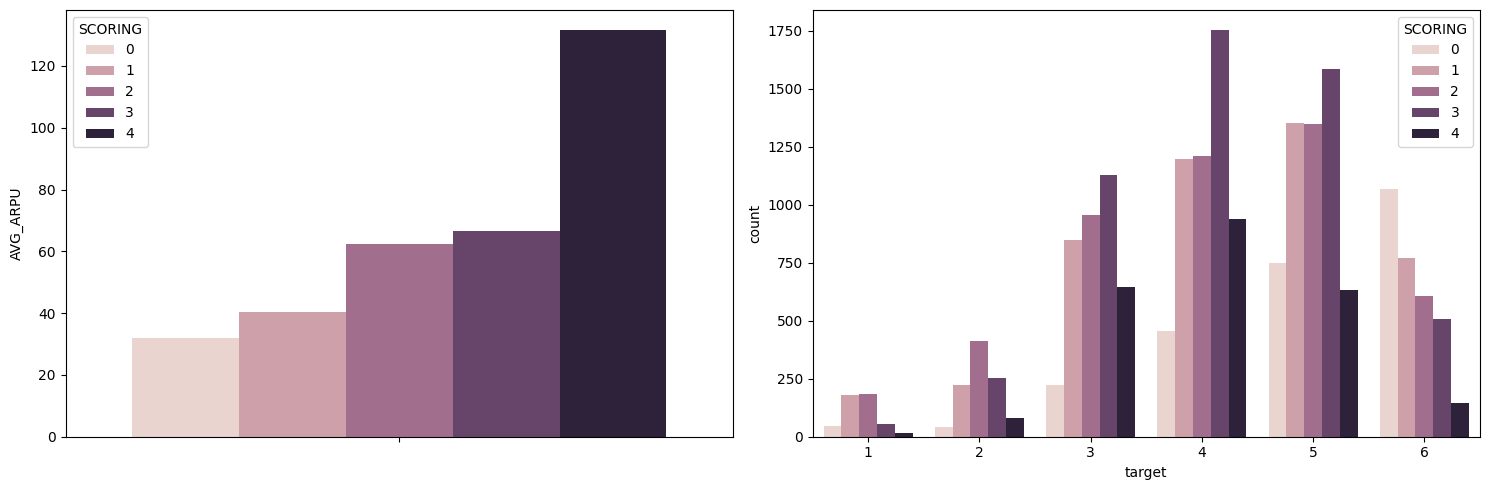

AVG_ARPU                                                  \
target            1           2           3           4           5   
SCORING                                                               
0         36.623875   27.507583   29.645196   32.372700   32.291417   
1         36.958125   36.457675   40.486854   40.174579   40.874908   
2         74.145808   78.368313   67.366482   60.846075   58.877958   
3         76.940533   78.571271   70.311558   66.637196   62.812867   
4        145.591650  125.636858  134.707121  136.862825  122.584742   

                     
target            6  
SCORING              
0         31.757046  
1         40.355342  
2         46.249033  
3         57.858350  
4        114.094467

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(data=eda_data, y='AVG_ARPU', hue='SCORING', estimator='median', errorbar=None, ax=axes[0])
sns.countplot(data=eda_data, x='target', hue='SCORING', ax=axes[1])

plt.tight_layout()
plt.show()

eda_data.pivot_table(index='SCORING', columns='target', aggfunc='median' ,values=['AVG_ARPU'])

>* We can notice that the more income a user has, the more he spends on average per month on the tariff.
>* Also we can see that with the increase of the age group the number of people who earn very little increases.(which is natural). 


### Trafic

In [63]:
trafic_data = eda_data[['online_services_and_digital_stores_volume'
                        ,'social_networks_and_messengers_volume'
                        ,'video_content_and_streaming_volume'
                        ,'dating_and_social_platforms_volume',
                        'cloud_services_and_email_volume',
                        'maps_and_transport_volume']]

trafic_data['total_trafic'] = trafic_data.sum(axis=1)
 
weekvolume_data = eda_data[['DATA_VOLUME_WEEKDAYS', 'DATA_VOLUME_WEEKENDS']]

C:\Users\dimal\AppData\Local\Temp\ipykernel_23716\3768882278.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trafic_data['total_trafic'] = trafic_data.sum(axis=1)


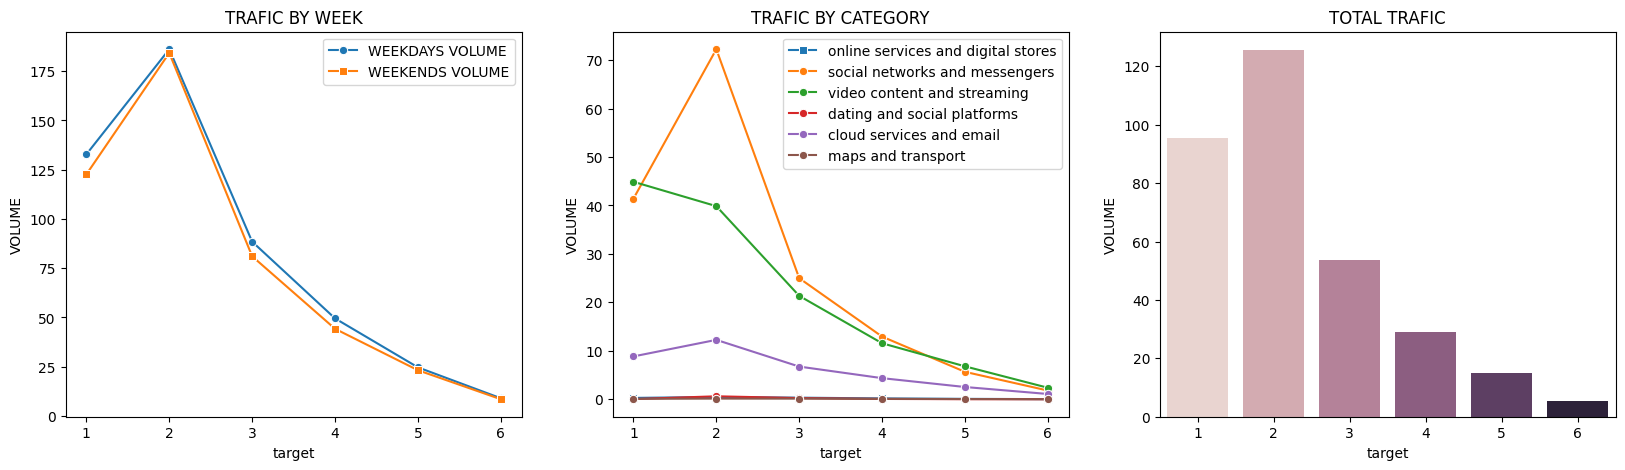

In [64]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
sns.lineplot(x=eda_data['target'], y='DATA_VOLUME_WEEKDAYS'
             , data=weekvolume_data, label='WEEKDAYS VOLUME', marker='o', errorbar= None, ax=axes[0])
sns.lineplot(x=eda_data['target'], y='DATA_VOLUME_WEEKENDS'
             , data=weekvolume_data, label='WEEKENDS VOLUME', marker='s', errorbar= None, ax=axes[0])
axes[0].set_ylabel('VOLUME')
axes[0].set_title('TRAFIC BY WEEK')

sns.lineplot(x=eda_data['target'], y='online_services_and_digital_stores_volume'
             , data=trafic_data, label='online services and digital stores', marker='s', errorbar= None, ax=axes[1])
sns.lineplot(x=eda_data['target'], y='social_networks_and_messengers_volume'
             , data=trafic_data, label='social networks and messengers', marker='o', errorbar= None, ax=axes[1])
sns.lineplot(x=eda_data['target'], y='video_content_and_streaming_volume'
             , data=trafic_data, label='video content and streaming', marker='o', errorbar= None, ax=axes[1])
sns.lineplot(x=eda_data['target'], y='dating_and_social_platforms_volume'
             , data=trafic_data, label='dating and social platforms', marker='o', errorbar= None, ax=axes[1])
sns.lineplot(x=eda_data['target'], y='cloud_services_and_email_volume'
             , data=trafic_data, label='cloud services and email', marker='o', errorbar= None, ax=axes[1])
sns.lineplot(x=eda_data['target'], y='maps_and_transport_volume'
             , data=trafic_data, label='maps and transport', marker='o', errorbar= None, ax=axes[1])
axes[1].set_ylabel('VOLUME')
axes[1].set_title('TRAFIC BY CATEGORY')

sns.barplot(x=eda_data['target'], y='total_trafic'
            , data=trafic_data, errorbar= None, hue=eda_data['target'], legend=None, ax=axes[2])
axes[2].set_ylabel('VOLUME')
axes[2].set_title('TOTAL TRAFIC')

plt.show()

>* The dataset lacks information about specific **categories/services** for which traffic was used, which is why the values of `TOTAL TRAFIC` and `TRAFIC BY WEEK` are different.
>* We can see very clearly how low age groups consume much more traffic than high ones.

## Corelation

In [65]:
# Separating the target
TARGET = eda_data['target']
eda_data = eda_data.drop('target', axis=1)

In [66]:
# Dummies categorical features
eda_data_dummies = pd.get_dummies(eda_data, columns=['Oblast_post_HOME', 'Raion_post_HOME'
                                                     ,'City_post_HOME', 'Oblast_post_WORK'
                                                     ,'Raion_post_WORK', 'City_post_WORK'
                                                     ,'device_type_rus'], drop_first=True)

In [67]:
eda_data_dummies = eda_data_dummies.loc[:, ~eda_data_dummies.columns.str.contains('_volume')].copy()
print(eda_data_dummies.columns)

Index(['CALCULATION_METHOD_ID', 'sim_count', 'AVG_ARPU', 'phone_value',
       'SCORING', 'car', 'gender', 'DATA_VOLUME_WEEKDAYS',
       'DATA_VOLUME_WEEKENDS', 'calls_count_in_weekdays',
       ...
       'City_post_WORK_Ямниця', 'City_post_WORK_Ямпіль',
       'City_post_WORK_Яноші', 'City_post_WORK_Ярова',
       'City_post_WORK_Ярославка', 'City_post_WORK_Ясенівський',
       'City_post_WORK_Ясининичі', 'City_post_WORK_Яструбове',
       'device_type_rus_phone', 'device_type_rus_smartphone'],
      dtype='object', length=4305)


In [68]:
# Calculating the correlation
corr_target = []

for column in eda_data_dummies.columns:
    corr = spearmanr(eda_data_dummies[f'{column}'], TARGET)
    corr_target.append({'colomn_name': column
                        ,'statistic': corr.statistic
                        ,'pvalue':corr.pvalue})

corr_target = pd.DataFrame(corr_target) 

corr_target

,colomn_name,statistic,pvalue
0,CALCULATION_METHOD_ID,0.374059,0.000000e+00
1,sim_count,0.023113,1.206259e-03
2,AVG_ARPU,-0.195465,3.523751e-168
3,phone_value,0.296095,0.000000e+00
4,SCORING,-0.190539,9.323334e-160
...,...,...,...
4300,City_post_WORK_Ясенівський,-0.001405,8.439951e-01
4301,City_post_WORK_Ясининичі,0.010731,1.328520e-01
4302,City_post_WORK_Яструбове,-0.011456,1.086054e-01
4303,device_type_rus_phone,0.266180,0.000000e+00


In [69]:
# Test for significance
corr_target = corr_target[corr_target['pvalue'] < 0.05]

# Top 'N' with the highest correlation  
corr_target_top = corr_target.sort_values(by='statistic', key=abs, ascending=False)
corr_target_top = corr_target_top.head(20)

Text(0.5, 36.72222222222221, 'Spearman Correlation')

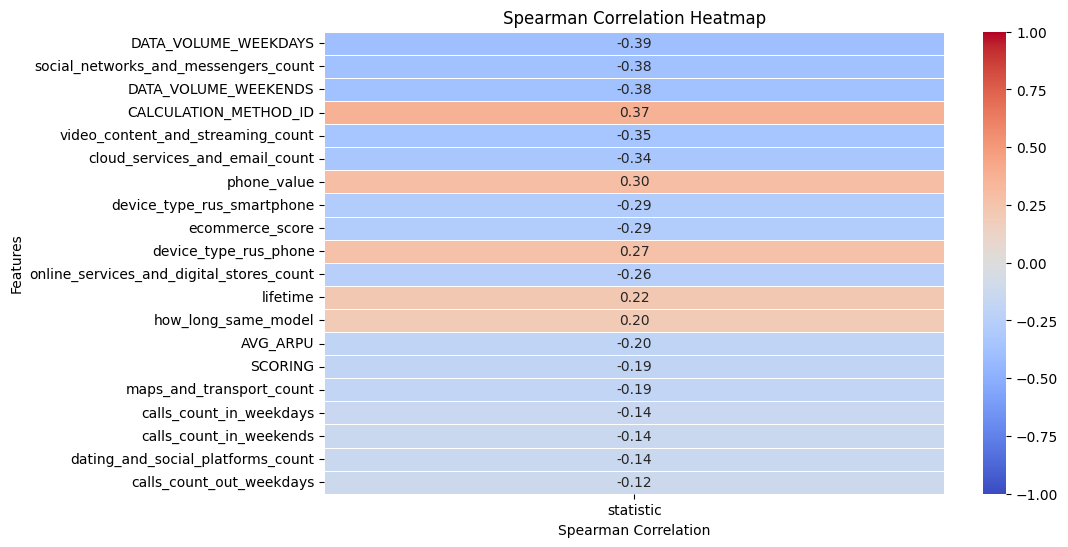

In [70]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_target_top.set_index('colomn_name')[['statistic']]
            , annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)

plt.title("Spearman Correlation Heatmap")
plt.ylabel("Features")
plt.xlabel("Spearman Correlation")

In [71]:
eda_data_dummies_analis = pd.concat([eda_data_dummies[corr_target_top['colomn_name'].tolist()], TARGET], axis=1)
eda_data_dummies_analis.to_csv('./data/eda_data_dummies.csv', index=False)

In [72]:
eda_data_dummies_analis.head()

,DATA_VOLUME_WEEKDAYS,social_networks_and_messengers_count,DATA_VOLUME_WEEKENDS,CALCULATION_METHOD_ID,video_content_and_streaming_count,cloud_services_and_email_count,phone_value,device_type_rus_smartphone,ecommerce_score,device_type_rus_phone,...,lifetime,how_long_same_model,AVG_ARPU,SCORING,maps_and_transport_count,calls_count_in_weekdays,calls_count_in_weekends,dating_and_social_platforms_count,calls_count_out_weekdays,target
0,154.837,700.72,181.143,1,208.84,540.29,3.0,True,1,False,...,38.700000,25.0,260.739450,3,0.0,10.87,7.00,0.0,17.74,4
1,53.639,32.04,49.009,0,13.13,113.16,3.0,True,0,False,...,159.533333,10.0,52.635025,1,0.0,0.91,0.25,0.0,0.48,4
2,0.000,0.00,0.000,1,0.00,0.00,4.0,False,0,True,...,177.900000,25.0,22.189575,0,0.0,0.00,0.00,0.0,0.00,6
3,0.000,0.00,0.000,1,0.00,0.00,4.0,False,0,True,...,85.633333,25.0,41.816525,0,0.0,7.39,5.00,0.0,11.00,5
4,0.000,0.00,0.000,0,0.00,0.00,3.0,True,0,False,...,130.200000,23.0,39.863417,1,0.0,0.43,2.25,0.0,0.70,3
